In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df_transactions = pd.read_csv('personal_transactions.csv')
df_budget = pd.read_csv ('Budget.csv')

In [6]:
df_transactions.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [7]:
df_budget.head()

,Category,Budget
0,Alcohol & Bars,50
1,Auto Insurance,75
2,Coffee Shops,15
3,Electronics & Software,0
4,Entertainment,25


In [8]:
# Convertendo as colunas de data para o formato datetime
df_transactions['Date'] = pd.to_datetime(df_transactions['Date'], errors='coerce')


In [10]:
# verificando e tratando colunas 'Amount' e 'Budget'
df_transactions['Amount'] = pd.to_numeric(df_transactions['Amount'], errors='coerce')
df_budget['Budget'] = pd.to_numeric(df_budget['Budget'], errors='coerce')


In [11]:
# Dados Faltantes
df_transactions.isnull().sum()

Date                0
Description         0
Amount              0
Transaction Type    0
Category            0
Account Name        0
dtype: int64

In [12]:
df_budget.isnull().sum()

Category    0
Budget      0
dtype: int64

In [13]:
# Padronização de categorias de transações
df_transactions['Category'] = df_transactions['Category'].str.lower().str.strip()
df_budget['Category'] = df_budget['Category'].str.lower().str.strip()


# Analise😍

<Axes: title={'center': 'Gastos por Categoria'}, ylabel='Category'>

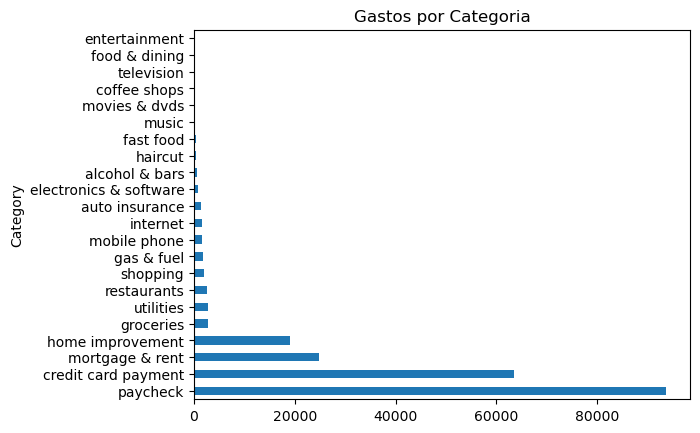

In [14]:
# Gastos por Categoria
category_expense = df_transactions.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_expense.plot(kind='barh', title='Gastos por Categoria')


In [17]:
# Comparação com o Orçamento
df_merge = pd.merge(df_budget, df_transactions.groupby('Category')['Amount'].sum().reset_index(), on='Category', how='left')
df_merge['Diferença'] = df_merge['Budget'] - df_merge['Amount']



<Axes: title={'center': 'Gastos Mensais'}, xlabel='Month'>

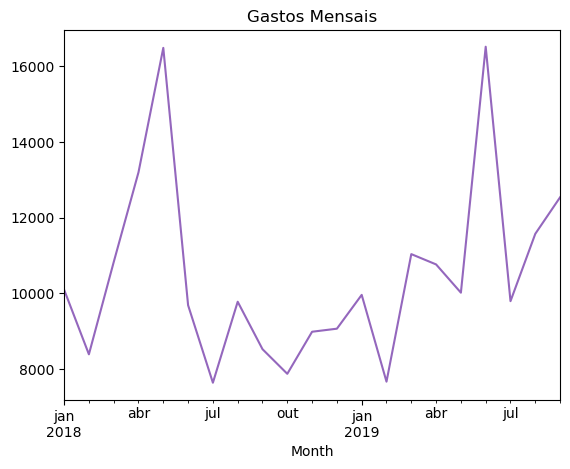

In [19]:
# Gastos mensais 
df_transactions['Month'] = df_transactions['Date'].dt.to_period('M')
monthly_expense = df_transactions.groupby('Month')['Amount'].sum()
monthly_expense.plot(kind='line', title='Gastos Mensais', color = 'C4')


In [20]:
# identificar desvios do orçamento
df_merge[df_merge['Diferença'] < 0]  # Gastos acima do orçamento


,Category,Budget,Amount,Diferença
0,alcohol & bars,50,539.13,-489.13
1,auto insurance,75,1350.00,-1275.00
2,coffee shops,15,115.54,-100.54
3,electronics & software,0,719.00,-719.00
5,fast food,15,330.63,-315.63
6,gas & fuel,75,1715.17,-1640.17
7,groceries,150,2795.21,-2645.21
8,haircut,30,378.00,-348.00
9,home improvement,250,19092.87,-18842.87
10,internet,75,1570.88,-1495.88


In [22]:
# Prepaeação para a interface do app
df_summary = df_merge[['Category', 'Budget', 'Amount', 'Diferença']]
df_summary.to_csv("summary_for_app.csv", index=False)
# DataFrames tratados e exportáveis para alimentar o app


# Gráficoss🥶🤤🥵

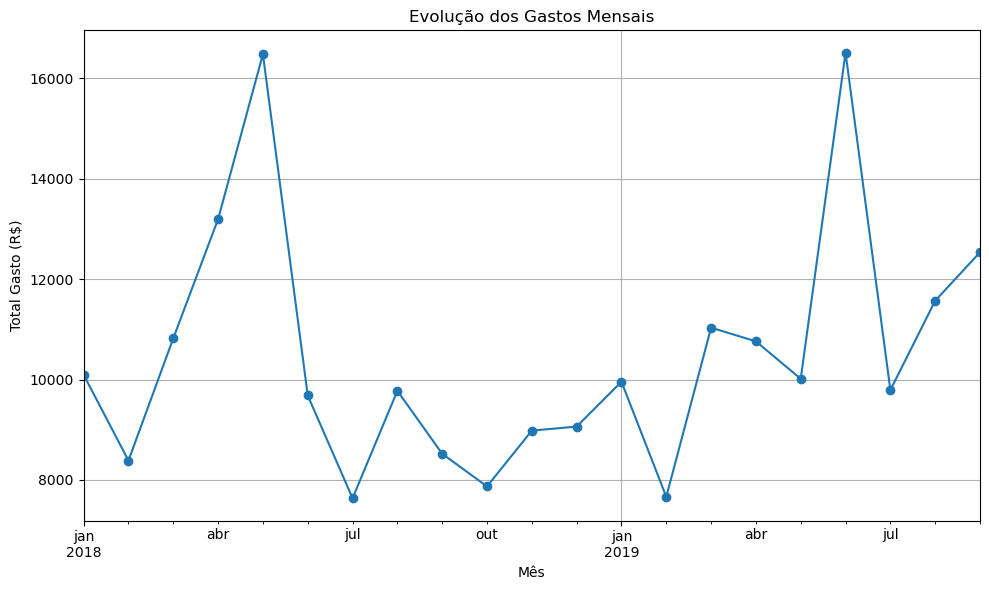

In [24]:
df_transactions['Month'] = df_transactions['Date'].dt.to_period('M')
monthly_expense = df_transactions.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,6))
monthly_expense.plot(marker='o')
plt.title('Evolução dos Gastos Mensais')
plt.xlabel('Mês')
plt.ylabel('Total Gasto (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()


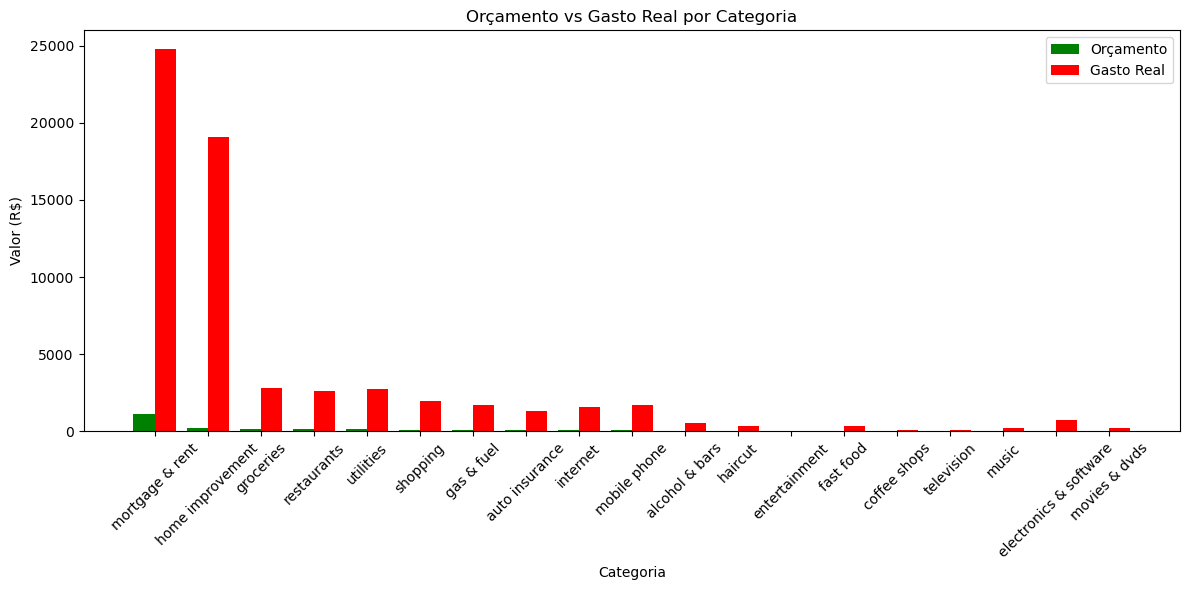

In [28]:
df_merge = pd.merge(
    df_budget,
    df_transactions.groupby('Category')['Amount'].sum().reset_index(),
    on='Category',
    how='left'
).fillna(0)

df_merge['Diferença'] = df_merge['Budget'] - df_merge['Amount']

df_plot = df_merge.sort_values('Budget', ascending=False)

plt.figure(figsize=(12,6))
bar_width = 0.4
index = np.arange(len(df_plot))

plt.bar(index, df_plot['Budget'], bar_width, label='Orçamento', color='green')
plt.bar(index + bar_width, df_plot['Amount'], bar_width, label='Gasto Real', color='red')

plt.xlabel('Categoria')
plt.ylabel('Valor (R$)')
plt.title('Orçamento vs Gasto Real por Categoria')
plt.xticks(index + bar_width / 2, df_plot['Category'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


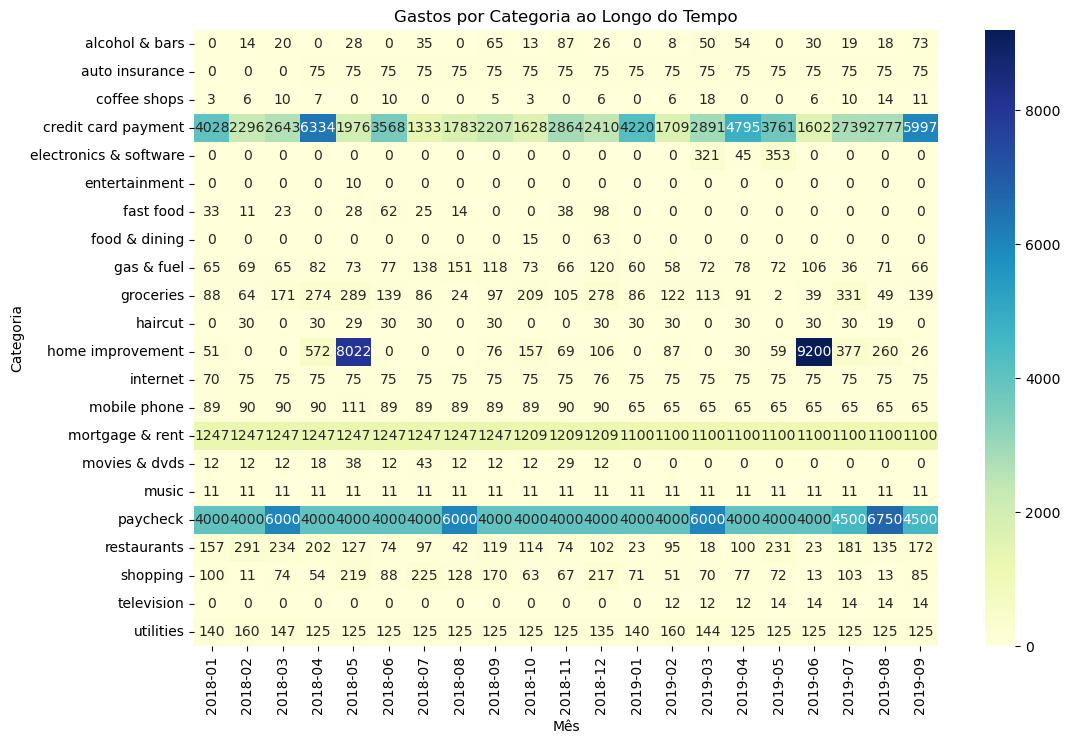

In [29]:
df_transactions['Month'] = df_transactions['Date'].dt.to_period('M')
pivot = df_transactions.pivot_table(
    values='Amount',
    index='Category',
    columns='Month',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Gastos por Categoria ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Categoria')
plt.show()


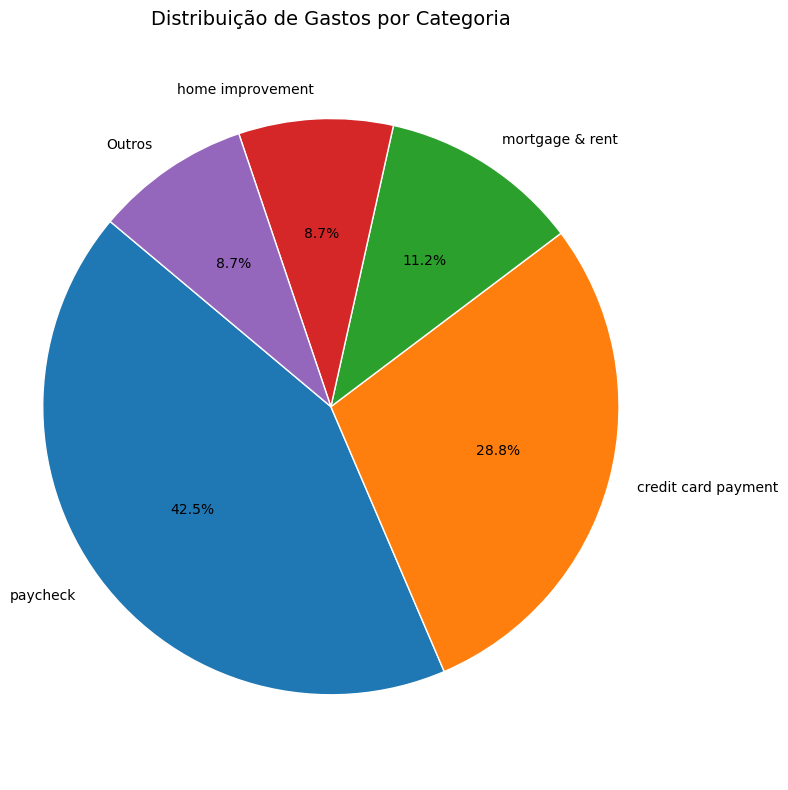

In [31]:

# Defina o limite para separar categorias grandes das pequenas (exemplo: 5%)
limite = 0.05

category_expense = df_transactions.groupby('Category')['Amount'].sum().sort_values(ascending=False)

total = category_expense.sum()
category_percent = category_expense / total

categorias_grandes = category_percent[category_percent > limite]
categorias_pequenas = category_percent[category_percent <= limite]

# Combinar categorias pequenas em "Outros"
if not categorias_pequenas.empty:
    categorias_grandes['Outros'] = categorias_pequenas.sum()

plt.figure(figsize=(8,8))
plt.pie(categorias_grandes, 
        labels=categorias_grandes.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        wedgeprops={'edgecolor': 'white'}, 
        textprops={'fontsize': 10})

plt.title('Distribuição de Gastos por Categoria', fontsize=14)
plt.axis('equal')  # Mantém o formato redondo
plt.tight_layout()
plt.show()


# 📊 Gráficos para o Dashboard Inicial

In [ ]:
# Total Gasto no Mês Atual
hoje = pd.Timestamp.today()
mes_atual = hoje.month
ano_atual = hoje.year

gastos_mes_atual = df_transactions[
    (df_transactions['Date'].dt.month == mes_atual) & 
    (df_transactions['Date'].dt.year == ano_atual)
]['Amount'].sum()

print(f"💸 Total Gasto em {hoje.strftime('%B/%Y')}: R$ {gastos_mes_atual:,.2f}")

💸 Total Gasto em maio/2025: R$ 0.00


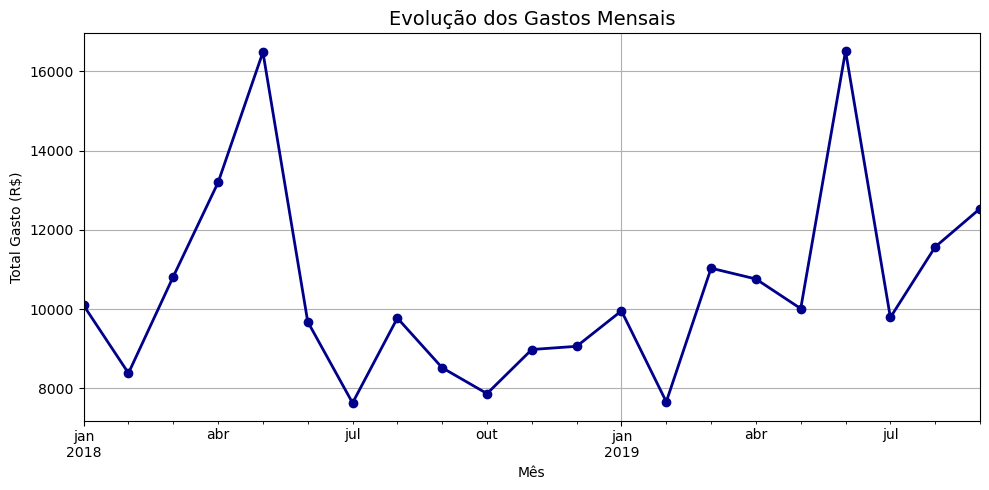

In [34]:
# evolução dos gastos mensais
df_transactions['Month'] = df_transactions['Date'].dt.to_period('M')
monthly_expense = df_transactions.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
monthly_expense.plot(marker='o', linewidth=2, color='darkblue')
plt.title('Evolução dos Gastos Mensais', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Total Gasto (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()


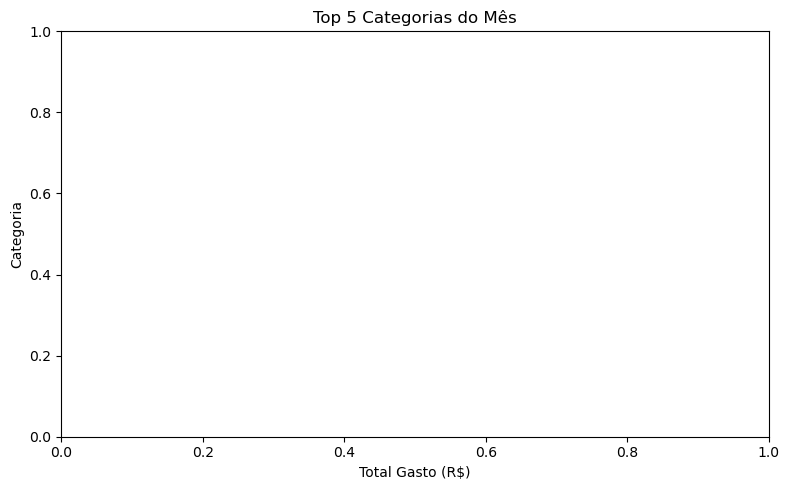

In [35]:
# top 5 categorias de gastos do mês atual
df_mes_atual = df_transactions[
    (df_transactions['Date'].dt.month == mes_atual) & 
    (df_transactions['Date'].dt.year == ano_atual)
]

top_categorias = df_mes_atual.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='rocket')
plt.title('Top 5 Categorias do Mês')
plt.xlabel('Total Gasto (R$)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()


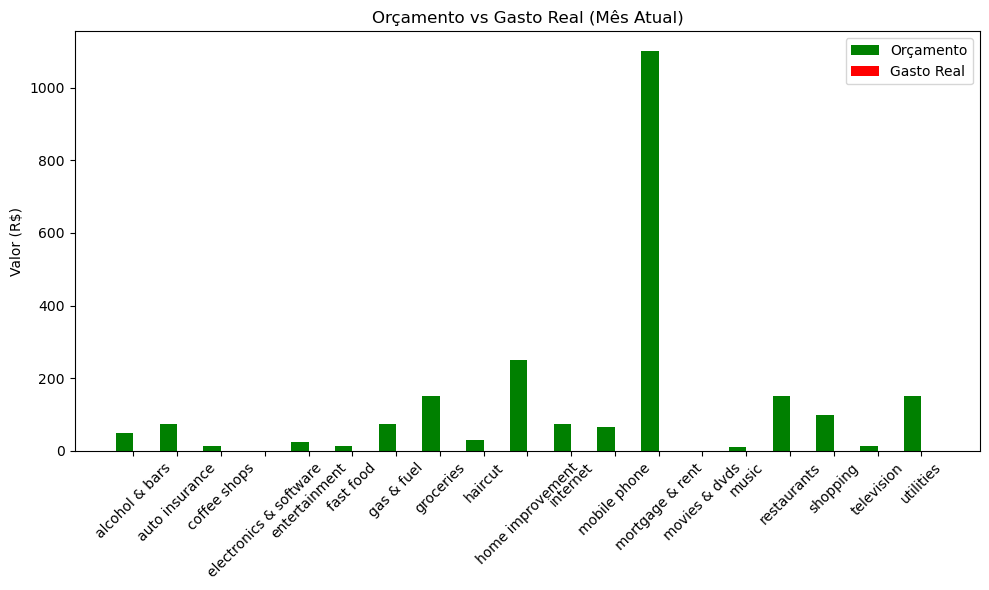

In [37]:
# Comparativo Orçamento vs Gasto Real

df_gastos_categoria = df_mes_atual.groupby('Category')['Amount'].sum().reset_index()

df_comparativo = pd.merge(
    df_budget,
    df_gastos_categoria,
    on='Category',
    how='left'
).fillna(0)

df_comparativo['Diferença'] = df_comparativo['Budget'] - df_comparativo['Amount']

plt.figure(figsize=(10,6))
bar_width = 0.4
index = np.arange(len(df_comparativo))

plt.bar(index, df_comparativo['Budget'], bar_width, label='Orçamento', color='green')
plt.bar(index + bar_width, df_comparativo['Amount'], bar_width, label='Gasto Real', color='red')

plt.xticks(index + bar_width / 2, df_comparativo['Category'], rotation=45)
plt.ylabel('Valor (R$)')
plt.title('Orçamento vs Gasto Real (Mês Atual)')
plt.legend()
plt.tight_layout()
plt.show()
